### Task 4 - Modelling
<ol tpye="1">
<li>Model Selection and Training
<li>Split the Data
<li>Splitting the data into training and testing sets helps evaluate the model’s performance on unseen data.
</ol>

In [1]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv(r'E:/KAIM 2/KAIM 2 Week 6/Week-6/data/model-data.csv')

In [6]:
df.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CountryCode,ProviderId,ProductId,ChannelId,Amount,...,Recency,Frequency,Monetary,Stability,Recency_WoE,Frequency_WoE,Monetary_WoE,Stability_WoE,predicted_prob,predicted_label
0,76871,36123,3957,887,4406,256,6,10,3,-0.046371,...,90,119,-5.591789,0.024673,-1.886379,13.489380,12.390767,12.390767,0.004486,0
1,73770,15642,4841,3829,4406,256,4,6,2,-0.054643,...,90,119,-5.591789,0.024673,-1.886379,13.489380,12.390767,12.390767,0.004486,0
2,26203,53941,4229,222,4683,256,6,1,3,-0.050426,...,90,2,-0.100852,0.000000,-1.886379,-1.608747,11.195163,-1.574980,0.000425,0
3,380,102363,648,2185,988,256,1,21,3,0.107717,...,90,38,-0.215326,0.139241,-1.886379,13.040990,11.249230,11.249230,0.007304,0
4,28195,38780,4841,3829,988,256,4,6,2,-0.059704,...,90,38,-0.215326,0.139241,-1.886379,13.040990,11.249230,11.249230,0.007304,0


In [7]:
from sklearn.model_selection import train_test_split
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Stability']
# Features (X) and Target (y)
X = df[[feature + '_WoE' for feature in rfms_features]]
y = df['FraudResult']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")


Training set: 76529 samples
Testing set: 19133 samples


1) Model Selection and Training

Choose at least two models  from the following:<ol>
<li>Logistic Regression
<li>Decision Trees
<li>Random Forest
<li>Gradient Boosting Machines (GBM)
<li>Train the Models
<li>Train the models on the training data </ol>


In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression

# Initialize the model
logreg_model = LogisticRegression(random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [11]:
# Gradient boost classifier
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the model
gbm_model = GradientBoostingClassifier(random_state=42)

# Train the model
gbm_model.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

4) Hyperparameter Tunning

Improve model performance using hyperparameter tuning, use techniques like:
<ol>
<li>Grid Search
<li>Random Search
</ol>


In [ ]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
logreg_params = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(LogisticRegression(random_state=42), logreg_params, cv=5, scoring='roc_auc')
logreg_grid.fit(X_train, y_train)

# Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10]
}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5, scoring='roc_auc')
dt_grid.fit(X_train, y_train)

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)

# Gradient Boosting Machine (GBM)
gbm_params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7]
}
gbm_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), gbm_params, cv=5, scoring='roc_auc')
gbm_grid.fit(X_train, y_train)

# Best parameters for each model
print("Logistic Regression - Best Parameters:", logreg_grid.best_params_)
print("Decision Tree - Best Parameters:", dt_grid.best_params_)
print("Random Forest - Best Parameters:", rf_grid.best_params_)
print("Gradient Boosting Machine - Best Parameters:", gbm_grid.best_params_)

# Use best models for prediction
logreg_model = logreg_grid.best_estimator_
dt_model = dt_grid.best_estimator_
rf_model = rf_grid.best_estimator_
gbm_model = gbm_grid.best_estimator_


c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\you\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\you\AppData\Local\

2) Model Evaluation

Assess model performance using the following metrics
<ol type='a'>
<li> <b>Accuracy</b>: The ratio of correctly predicted observations to the total observations.
<li> <b>Precision</b>: The ratio of correctly predicted positive observations to the total predicted positives.
<li> <b>Recall (Sensitivity)</b>: The ratio of correctly predicted positive observations to all observations in the actual class.
<<li> <b>F1 Score</b>: The weighted average of Precision and Recall.
<li> <b>ROC-AUC</b>: Area Under the Receiver Operating Characteristic Curve, which measures the ability of the model to distinguish between classes. 

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    'Logistic Regression': logreg_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'Gradient Boosting Machine': gbm_model
}

# Evaluate each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"Model: {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))
    print("\n")


Model: Logistic Regression
Accuracy: 0.9989214452633471
Precision: 0.8333333333333334
Recall: 0.22727272727272727
F1 Score: 0.35714285714285715
ROC-AUC Score: 0.9986254820358138


Model: Decision Tree
Accuracy: 0.9984420876026125
Precision: 0.375
Recall: 0.2727272727272727
F1 Score: 0.3157894736842105
ROC-AUC Score: 0.9984618489448392


Model: Random Forest
Accuracy: 0.9985619270177961
Precision: 0.45454545454545453
Recall: 0.45454545454545453
F1 Score: 0.45454545454545453
ROC-AUC Score: 0.9985027572175829


Model: Gradient Boosting Machine
Accuracy: 0.9985619270177961
Precision: 0.4166666666666667
Recall: 0.22727272727272727
F1 Score: 0.29411764705882354
ROC-AUC Score: 0.9980364029083055




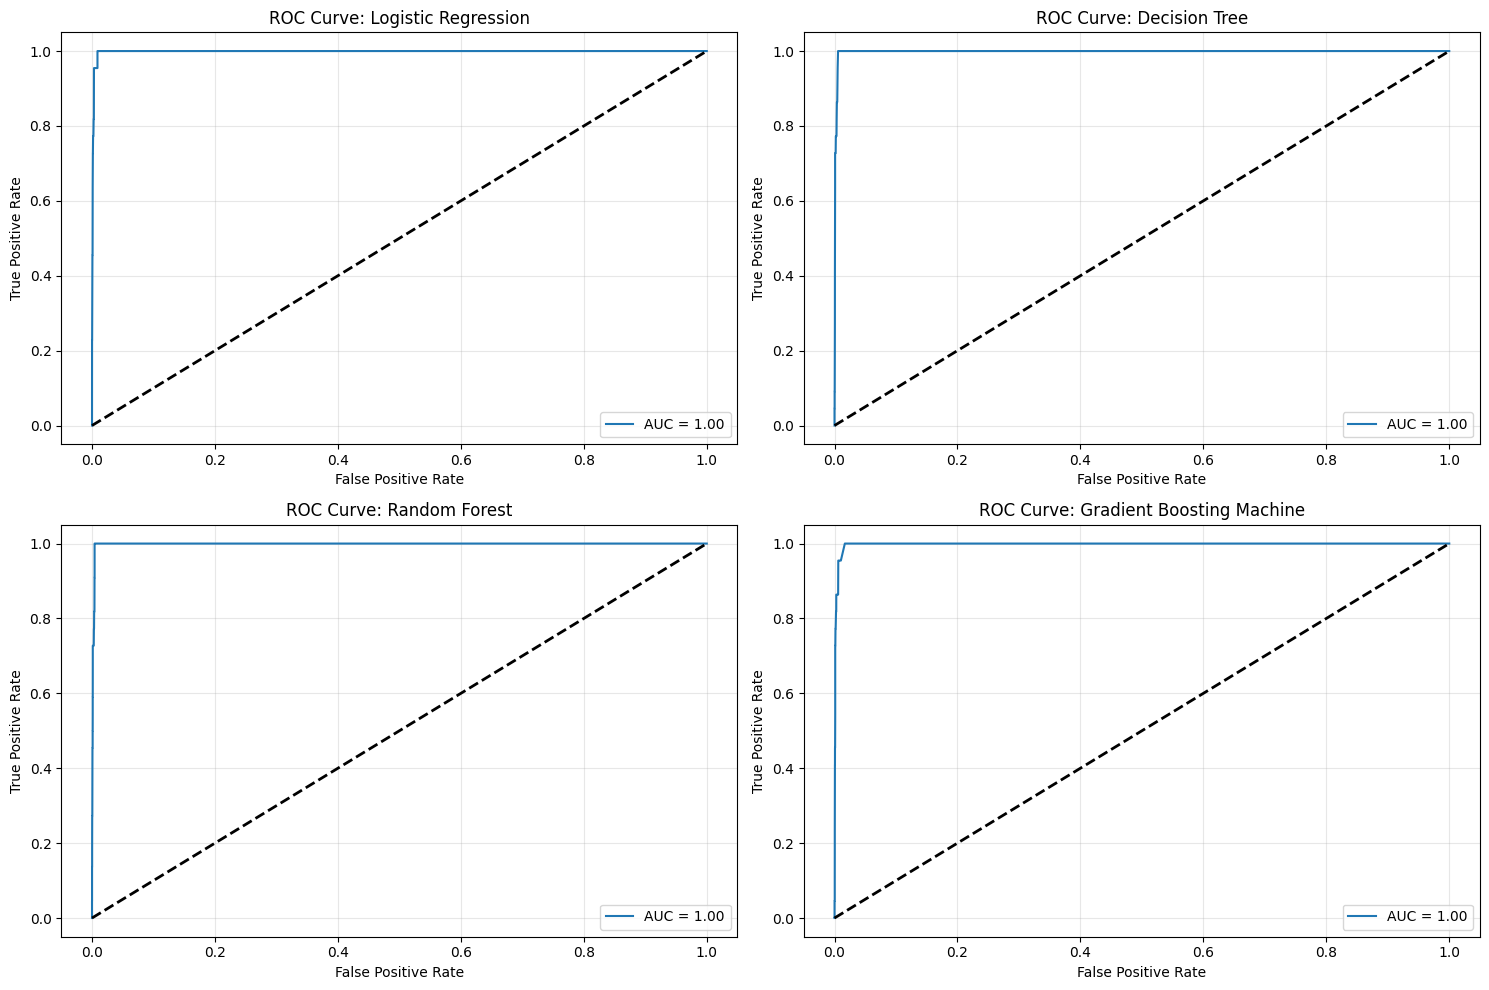

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Define the number of rows and columns for subplots
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

# Initialize the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Evaluate each model and plot the ROC curve in subplots
for idx, (model_name, model) in enumerate(models.items()):
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    # Plot ROC curve
    axs[idx].plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    axs[idx].plot([0, 1], [0, 1], 'k--', lw=2)
    axs[idx].set_xlabel('False Positive Rate')
    axs[idx].set_ylabel('True Positive Rate')
    axs[idx].set_title(f'ROC Curve: {model_name}')
    axs[idx].legend(loc='lower right')
    axs[idx].grid(alpha=0.3)

# Remove any empty subplots
for ax in axs[n_models:]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


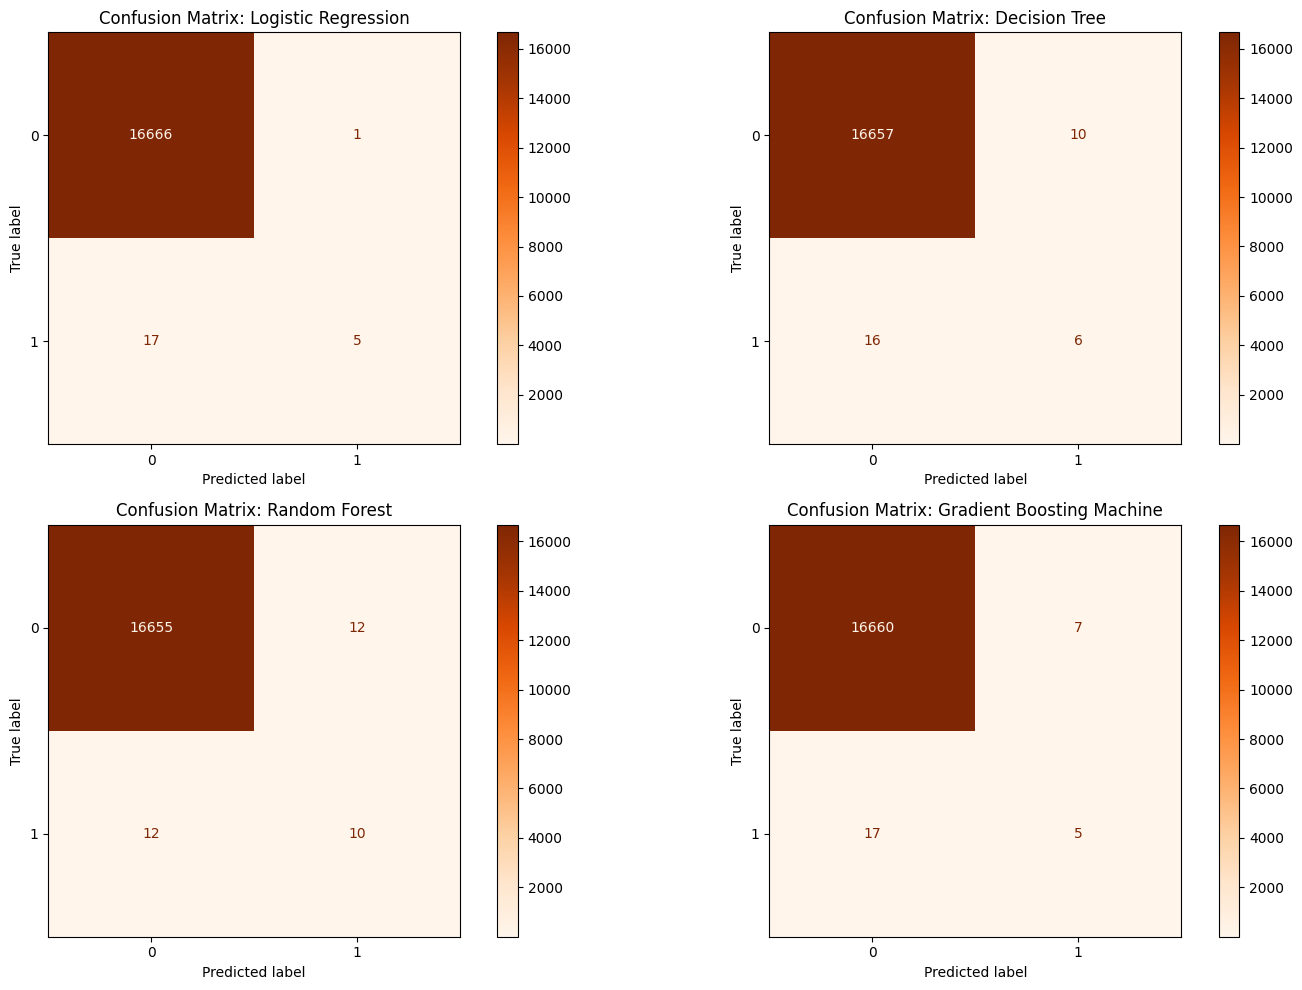

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the number of rows and columns for subplots
n_models = len(models)
n_cols = 2
n_rows = (n_models + 1) // n_cols

# Initialize the figure
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Evaluate each model and plot the confusion matrix in subplots
for idx, (model_name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])

    # Plot confusion matrix
    disp.plot(ax=axs[idx], cmap=plt.cm.Oranges, values_format='d')
    axs[idx].set_title(f'Confusion Matrix: {model_name}')

# Remove any empty subplots
for ax in axs[n_models:]:
    fig.delaxes(ax)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
